# STRAT read analysis

In [1]:
path = '/opt/data/workdir/bc6_1.guppy.reads.tsv'
cols = ['id', 'seq', 'qual']

In [2]:
import common as c

In [3]:
df = c.load(path, cols)

In [4]:
df.head(2)

,id,seq,qual
0,@e35b9192-ddf1-444b-ab1f-9eb279f017df,TATGTAACCTACTTGGTTCAGTTACGTATTGCTAAGGTTAAAAGGT...,"##$&&$#####$%(&)))*/1,,)),,26<96779JOR{EH{LFHE..."
1,@a9746b99-a4a4-4e10-a2b6-428ae3fd5252,GTGTTATGTTGTACCTTGGTTCAGTTCGTGTATTGCTAAGGTTAAA...,'(4754443.''$%&%&&'((*)***%%('((567>A=<<=@C@BC...


In [5]:
df = c.lengths(df, ['seq'], ['len_seq'])

array([[<Axes: title={'center': 'len_seq'}>]], dtype=object)

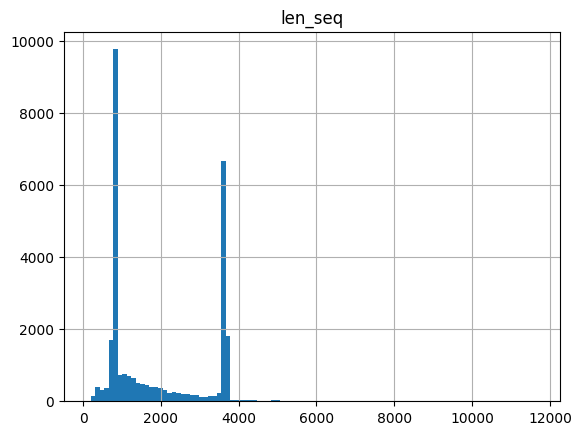

In [6]:
df.hist('len_seq', bins=100)

In [7]:
df = c.pd.concat([df, df.apply(lambda x: c.pd.Series(c.freqs(x['seq'], 'ACGT')), axis=1)], axis=1)

In [8]:
df

,id,seq,qual,len_seq,A,C,G,T
0,@e35b9192-ddf1-444b-ab1f-9eb279f017df,TATGTAACCTACTTGGTTCAGTTACGTATTGCTAAGGTTAAAAGGT...,"##$&&$#####$%(&)))*/1,,)),,26<96779JOR{EH{LFHE...",1125,300,257,267,301
1,@a9746b99-a4a4-4e10-a2b6-428ae3fd5252,GTGTTATGTTGTACCTTGGTTCAGTTCGTGTATTGCTAAGGTTAAA...,'(4754443.''$%&%&&'((*)***%%('((567>A=<<=@C@BC...,773,118,263,213,179
2,@85ef1b02-6b0d-4f9e-996a-cdf0b0cdebb7,GTTAACCGGTTCCGTTACGTATAAGGTTAAAAGGTTACACAAACCC...,%%%$%&%$$$%&%$%((()+'&%&;=EIGNOGGGFHGFE{QEFEED...,782,164,230,262,126
3,@543dbc09-f565-4159-905d-bd12d9c906de,ATGTCCTGTATTGGTTCAGTTACGTATTGCTAAGGTTAAAAGGTTA...,''*)&%'&&$$&$%&'(((((&'''./579:88899:767779778...,1284,296,341,344,303
4,@b7c6ad9d-5773-4865-81eb-993b9c4ba7cb,GTGCCTGTACTTCGTTTCATTACGTATTGCTAAGGTTAAAAGGTTA...,"#%%&'%&'%%'(&&%&)(**(&',+++-.=CGKEGGWIP{JNJ{=;...",3613,984,752,816,1061
...,...,...,...,...,...,...,...,...
29701,@9b824d25-2c82-46cf-b51d-aa8e202f5418,TTTTGTCCTGTACTTCGTTCAGTTACGTATTGCTAAGGTTAAAAGG...,%&''&&'')()%%'(.5=?BDCDJEDFMTHEHDKIJG{GIKH{MHO...,3591,1045,830,737,979
29702,@487ed714-cbdf-41ee-bd7a-ea8193d4e8bc,GTGCATCTCGTTCAGTTACGTATTGCTAAGGTTAAAAGGTTACACA...,"$%&$##""""#'-.69;;<=<;;>@B?@?:;DCCEGI{KKGGFKCDEF...",3162,997,589,588,988
29703,@4fdf7869-af44-4003-9295-12b860d6df22,ATGGCCTGTAACTTCGTTCAGTTACGTATTGCTAAGGTTAAAAGGT...,"$%%#$#$$$$$&(*'),-00111442355<75533<;==4<>AAD?...",796,168,233,269,126
29704,@d30c253c-36e1-49c6-9b19-f165b7fb5ca8,GATGTCCTCTACTTCGTTCAGTTACGTATTGCTAAGGTTAAAAGGT...,%%%%)&%&%$$%'(+-238887721015779<@>>>==>8;<BAA>...,806,124,274,236,172


In [9]:
df['AT'] = df.apply(lambda x: (x['A'] + x['T']) / x.len_seq, axis=1)

array([[<Axes: title={'center': 'AT'}>]], dtype=object)

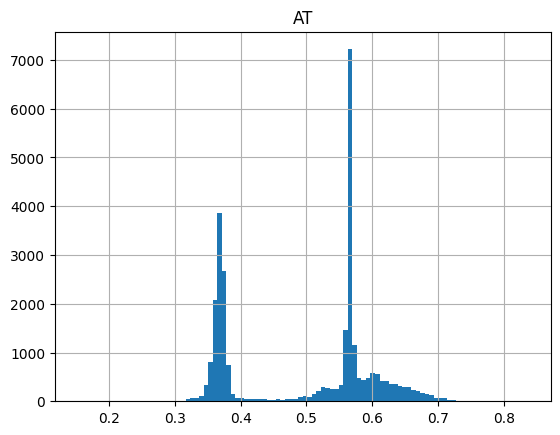

In [10]:
df.hist('AT', bins=100)

In [11]:
df['control'] = (df['AT'] > 0.53) & (df['AT'] < 1)

<Axes: xlabel='len_seq', ylabel='Count'>

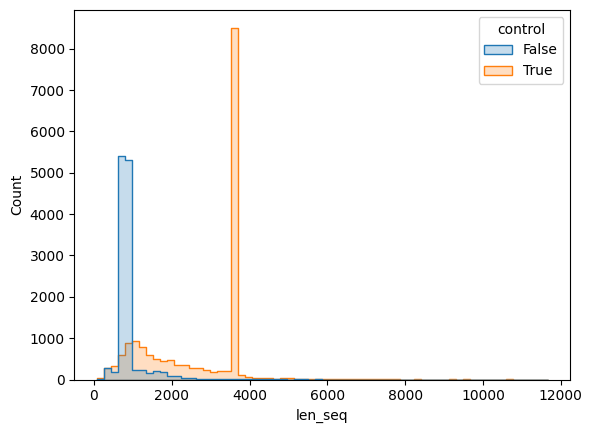

In [12]:
c.sns.histplot(data=df, x='len_seq', hue='control', element="step", stat="count", common_norm=False)

In [13]:
df['ontarget'] = df['seq'].str.contains('GTGATCC') | df['seq'].str.contains('GGATCAC')
df['ontarget'] = df['seq'].str.contains('CAGCAGCAG') | df['seq'].str.contains('CTGCTGCTG')

In [14]:
df['hue'] = df['control'].astype(str) + df['ontarget'].astype(str)

<Axes: xlabel='len_seq', ylabel='Count'>

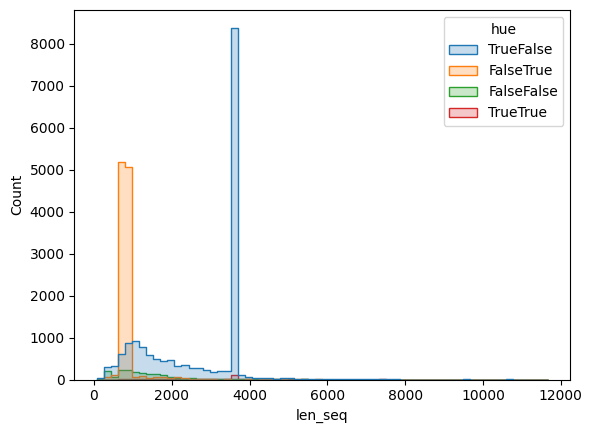

In [15]:
c.sns.histplot(data=df, x='len_seq', hue='hue', element="step", stat="count", common_norm=False)

<Axes: xlabel='len_seq', ylabel='Count'>

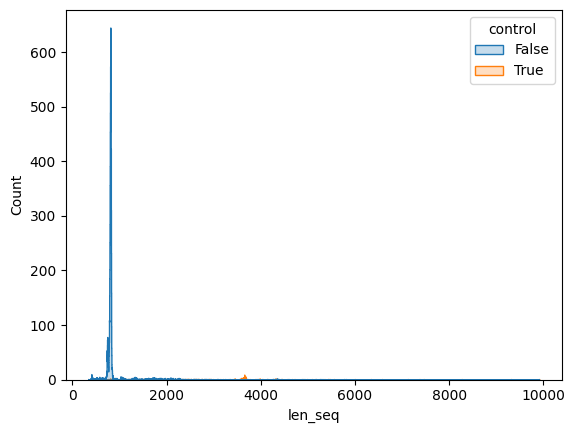

In [16]:
cond = df['ontarget']
c.sns.histplot(data=df[cond], x='len_seq', hue='control', element="step", stat="count", common_norm=False)

In [17]:
sum(df['ontarget'])

11260

In [18]:
cond = ~df['control'] & df['ontarget']

In [19]:
df[cond].sort_values('len_seq')['seq']

25853    ATGTGGCGTGTGCTTCGTTCAGTTACGTATTGCTAAGGTTAAAAGG...
26091    CTGCTGCTGCTGTAGATCAACCATTGCTTTATTTCGGCCAGGCTGA...
10878    CTGCTGCTGCTGCTGGGGGGGATCACAGACCATTTCTTGTTTCGGC...
20660    GCTGCTGCTGCTGCTGGGGGGATCACAGACCATTTCTTCTTTCGGC...
19384    TGTCACCTATTGGTTCAGTTACGTATTGCTAAGGTTAAAAGGTTAC...
                               ...                        
10663    ATGTAGTCTCTTGGTTCAGTTCTCGTATTGCTAAGGTTAAAAGGTT...
10662    TTATGTCCTCTTCTTCGTTCAGTTACGTATTGCTAAGGTTAAAAGG...
17160    TTTTGCCTGTTCTTGGTTCAGTTACGTATTGCTAAGGTTAAAAGGT...
18817    TCCTGCTTCGTTCGTTACGTATTGCTAAGGTTAAAAGGTTACACAA...
6539     ATGTATTCTACTTCGTTCAGTTACGTATTGCTAAGGCTAAAAGGTT...
Name: seq, Length: 10958, dtype: object

In [20]:
df[cond].sort_values('len_seq')['seq'].to_csv('/opt/data/workdir/bc6_1.guppy.reads.inspect.tsv', index=False)